In [20]:
import librosa
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt
import sounddevice as sd

In [21]:
# Function takes in file input and plots the signal.
def load_speech_signal(filename):
# Load the speech signal from a file
    y, sr = librosa.load(filename)
    return y, sr

In [22]:
def calculate_derivative(signal):
    # """Calculates the first derivative of a signal using the finite difference method."""
    derivative = np.diff(signal)
    return derivative

In [23]:
def play_audio(signal, sr):
    # """Plays the audio signal."""
    sd.play(signal, samplerate=sr)
    sd.wait()

In [24]:
def plot_signal(signal, title):
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

In [25]:
def detect_zero_crossings(signal):
    # """Detects zero crossings in a signal."""
    crossings = np.where(np.diff(np.sign(signal)))[0]
    return crossings

In [34]:
def analyze_speech_regions(signal, threshold=0.1):
    # """Analyzes speech regions in the audio signal."""
    
    # Compute the first derivative using finite difference method
    dy_dt = np.diff(signal)

    # Find the points of zero crossing in the first derivative signal
    zero_crossings = np.where(np.diff(np.sign(dy_dt)))[0]
    speech_regions = []  
    silence_regions = []

    for i in range(len(zero_crossings) - 1):
        start_idx = zero_crossings[i]
        end_idx = zero_crossings[i + 1]
        region = dy_dt[start_idx:end_idx]
        if np.mean(region) > threshold:  # Adjust the threshold based on your signal
            speech_regions.append(region)
        else:
            silence_regions.append(region)

    # Calculate the average length between consecutive zero crossings in speech and silence regions
    avg_length_speech = np.mean([len(region) for region in speech_regions])
    avg_length_silence = np.mean([len(region) for region in silence_regions])

    return avg_length_speech, avg_length_silence


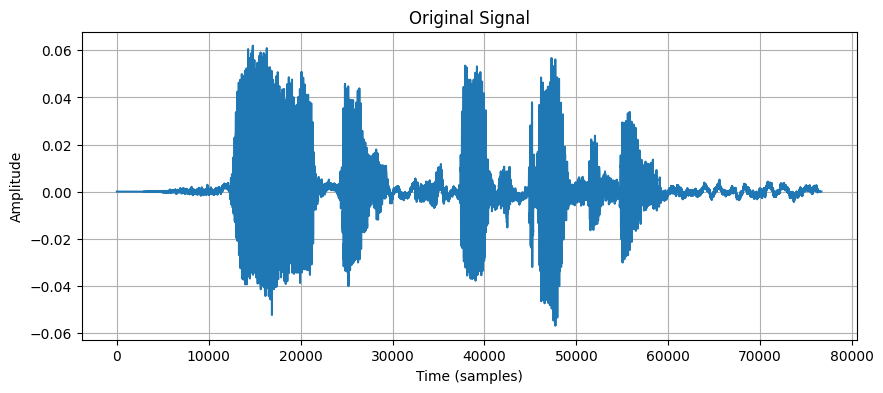

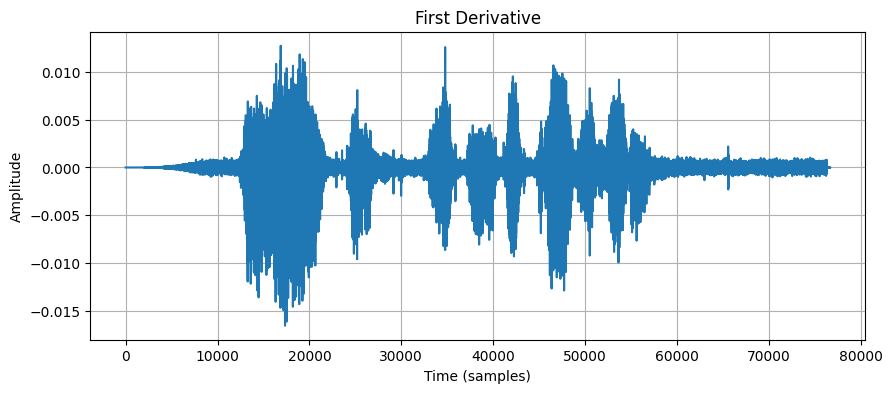

In [28]:
# A1. Load the recorded speech file and plot the signal
filename = r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio.mp3"
speech_signal, sr = load_speech_signal(filename)
# Calculate the first derivative
derivative = calculate_derivative(speech_signal)

# Play the original and derivative signals
play_audio(speech_signal, sr)
plot_signal(speech_signal, "Original Signal")
play_audio(derivative, sr)
plot_signal(derivative, "First Derivative")

In [36]:
# A2. Detect zero crossings and analyze speech and silence lengths
average_speech_length, average_silence_length = analyze_speech_regions(derivative, threshold=0.1)
print(f"Average speech length between zero crossings: {average_speech_length:.2f}")
print(f"Average silence length between zero crossings: {average_silence_length:.2f}")

Average speech length between zero crossings: nan
Average silence length between zero crossings: 1.68


In [ ]:
my_files = [r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p1.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p2.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p3.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p4.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\p5.wav"]
teammate_files=[r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a1.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a2.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a3.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a4.wav",r"E:\ASEB\3rd Year\6th\Speech Processing\AI-in-Speech-Processing\Lab-2\my_audio_a5.wav"]
